Trying fastaudio for myself : https://www.kaggle.com/scart97/fastaudio-starter-kit

In [1]:
!pip install --upgrade light-the-torch
!ltt install torch torchvision torchaudio
!pip install --upgrade git+http://github.com/fastaudio/fastaudio.git

     |████████████████████████████████| 776.7 MB 3.5 kB/s 
     |████████████████████████████████| 12.7 MB 36.1 MB/s 
     |████████████████████████████████| 7.6 MB 12.8 MB/s 
  Attempting uninstall: torch
    Found existing installation: torch 1.6.0
    Uninstalling torch-1.6.0:
      Successfully uninstalled torch-1.6.0
  Attempting uninstall: torchvision
    Found existing installation: torchvision 0.7.0
    Uninstalling torchvision-0.7.0:
      Successfully uninstalled torchvision-0.7.0
  Attempting uninstall: torchaudio
    Found existing installation: torchaudio 0.6.0a0+f17ae39
    Uninstalling torchaudio-0.6.0a0+f17ae39:
      Successfully uninstalled torchaudio-0.6.0a0+f17ae39
ERROR: After October 2020 you may experience errors when installing or updating packages. This is because pip will change the way that it resolves dependency conflicts.

We recommend you use --use-feature=2020-resolver to test your packages with the new resolver before it becomes the default.

fastai 2.0.

In [2]:
# this is needed for the library
import pkg_resources
def placeholder(x):
    raise pkg_resources.DistributionNotFound
pkg_resources.get_distribution = placeholder

In [3]:
import pandas as pd
from fastaudio.all import *
from fastai.vision.all import *

/opt/conda/lib/python3.7/site-packages/torchaudio/backend/utils.py:54: UserWarning: "sox" backend is being deprecated. The default backend will be changed to "sox_io" backend in 0.8.0 and "sox" backend will be removed in 0.9.0. Please migrate to "sox_io" backend. Please refer to https://github.com/pytorch/audio/issues/903 for the detail.
  '"sox" backend is being deprecated. '


In [4]:
path = Path("../input/rfcx-species-audio-detection")
for i in path.ls():
    print(i)

../input/rfcx-species-audio-detection/tfrecords
../input/rfcx-species-audio-detection/train_fp.csv
../input/rfcx-species-audio-detection/train
../input/rfcx-species-audio-detection/train_tp.csv
../input/rfcx-species-audio-detection/test
../input/rfcx-species-audio-detection/sample_submission.csv


In [5]:
train_path = path / 'train'
test_path = path / 'test'

In [6]:
train_files = get_audio_files(train_path)
len(train_files)

4727

3571


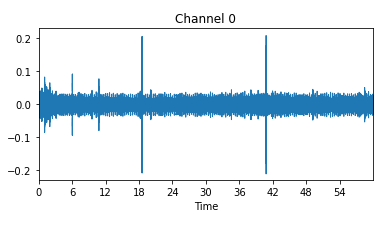

In [7]:
index =math.floor(random.random()*4727)
print(index)

# random bird chirping from amazon!
audio = AudioTensor.create(train_files[index])
audio.show()

In [8]:
df_train_tp = pd.read_csv(path/ 'train_tp.csv')
df_train_tp["recording_id"] = df_train_tp["recording_id"].map(lambda x: "train/"+x)
df_train_tp.head()

recording_id  species_id  songtype_id    t_min     f_min    t_max  \
0  train/003bec244          14            1  44.5440  2531.250  45.1307   
1  train/006ab765f          23            1  39.9615  7235.160  46.0452   
2  train/007f87ba2          12            1  39.1360   562.500  42.2720   
3  train/0099c367b          17            4  51.4206  1464.260  55.1996   
4  train/009b760e6          10            1  50.0854   947.461  52.5293   

      f_max  
0   5531.25  
1  11283.40  
2   3281.25  
3   4565.04  
4  10852.70

In [9]:
df_train_tp.iloc[:]

recording_id  species_id  songtype_id    t_min     f_min    t_max  \
0     train/003bec244          14            1  44.5440  2531.250  45.1307   
1     train/006ab765f          23            1  39.9615  7235.160  46.0452   
2     train/007f87ba2          12            1  39.1360   562.500  42.2720   
3     train/0099c367b          17            4  51.4206  1464.260  55.1996   
4     train/009b760e6          10            1  50.0854   947.461  52.5293   
...               ...         ...          ...      ...       ...      ...   
1211  train/fe8d9ac40          13            1  53.4720    93.750  54.0960   
1212  train/fea6b438a           4            1  43.5787  2531.250  45.7653   
1213  train/ff2eb9ce5           0            1  15.2267  5906.250  16.0213   
1214  train/ffb8d8391           5            1  14.3467  4781.250  16.6987   
1215  train/ffb9a7b9a          18            1  40.3200  3187.500  41.0133   

         f_max  
0      5531.25  
1     11283.40  
2      3281.25  
3      4565.04  
4     10852.70  
...        ...  
1211    843.75  
1212   4031.25  
1213   8250.00  
1214  10406.20  
1215   5062.50  

[1216 rows x 7 columns]

In [10]:
df_train_tp = df_train_tp.drop(['t_min', 't_max', 'f_min', 'f_max', 'songtype_id'],axis=1)
df_train_tp['species_id'] = df_train_tp['species_id'].astype(str)
df_train_tp.head()

recording_id species_id
0  train/003bec244         14
1  train/006ab765f         23
2  train/007f87ba2         12
3  train/0099c367b         17
4  train/009b760e6         10

In [11]:
df_train_tp['species_id'] = df_train_tp.groupby('recording_id')['species_id'].transform(",".join)
df_train_tp = df_train_tp.reset_index()

In [12]:
df_train_tp

index     recording_id species_id
0         0  train/003bec244         14
1         1  train/006ab765f         23
2         2  train/007f87ba2         12
3         3  train/0099c367b         17
4         4  train/009b760e6         10
...     ...              ...        ...
1211   1211  train/fe8d9ac40         13
1212   1212  train/fea6b438a          4
1213   1213  train/ff2eb9ce5          0
1214   1214  train/ffb8d8391          5
1215   1215  train/ffb9a7b9a         18

[1216 rows x 3 columns]

In [13]:
# this part is wizadry
audio_to_spec = AudioToSpec.from_cfg(AudioConfig.BasicMelSpectrogram(n_fft=512))
data_augmentation = [AddNoise(color=NoiseColor.White, noise_level=0.1), SignalShifter(max_pct=0.3)]

blocks = DataBlock(blocks=(AudioBlock, MultiCategoryBlock), get_x = ColReader('recording_id', pref=str(path.resolve()) + "/" , suff='.flac'),
                   get_y = ColReader('species_id', label_delim=','),
                   item_tfms = data_augmentation,
                   batch_tfms = audio_to_spec,
                   splitter = RandomSplitter(valid_pct=0.2, seed=42))

/opt/conda/lib/python3.7/site-packages/torchaudio/functional.py:318: UserWarning: At least one mel filterbank has all zero values. The value for `n_mels` (128) may be set too high. Or, the value for `n_freqs` (257) may be set too low.
  "At least one mel filterbank has all zero values. "


In [14]:
dls = blocks.dataloaders(df_train_tp,bs=24)

/opt/conda/lib/python3.7/site-packages/torch/functional.py:516: UserWarning: stft will require the return_complex parameter be explicitly  specified in a future PyTorch release. Use return_complex=False  to preserve the current behavior or return_complex=True to return  a complex output. (Triggered internally at  /pytorch/aten/src/ATen/native/SpectralOps.cpp:653.)
  normalized, onesided, return_complex)
/opt/conda/lib/python3.7/site-packages/torch/functional.py:516: UserWarning: The function torch.rfft is deprecated and will be removed in a future PyTorch release. Use the new torch.fft module functions, instead, by importing torch.fft and calling torch.fft.fft or torch.fft.rfft. (Triggered internally at  /pytorch/aten/src/ATen/native/SpectralOps.cpp:590.)
  normalized, onesided, return_complex)


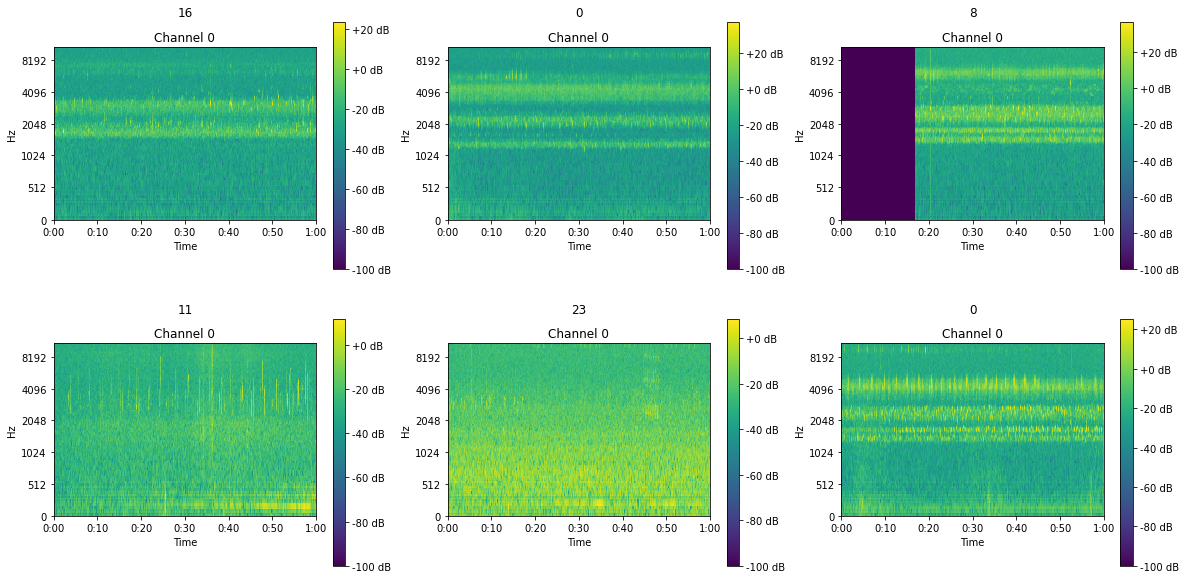

In [15]:
dls.show_batch(ncols=3, nrows=2, figsize=(20, 10))

In [16]:
learner = cnn_learner(dls, resnet18, config={"n_in":1})

Downloading: "https://download.pytorch.org/models/resnet18-5c106cde.pth" to /root/.cache/torch/hub/checkpoints/resnet18-5c106cde.pth


SuggestedLRs(lr_min=0.03630780577659607, lr_steep=0.03981071710586548)

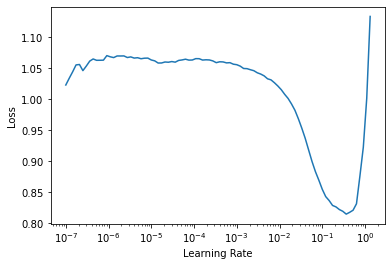

In [17]:
learner.lr_find()

In [18]:
learner.fine_tune(10, base_lr=5e-2)

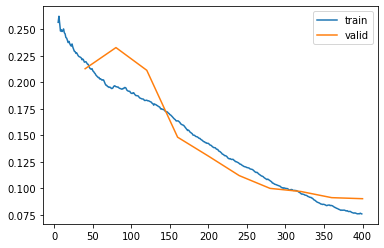

In [19]:
learner.recorder.plot_loss()

In [20]:
submission_df = pd.read_csv(path / 'sample_submission.csv')
submission_df["recording_id"] = submission_df["recording_id"].map(lambda x: "test/"+x)
submission_df

recording_id   s0   s1   s2   s3   s4   s5   s6   s7   s8  ...  s14  \
0     test/000316da7  0.5  0.5  0.5  0.5  0.5  0.5  0.5  0.5  0.5  ...  0.5   
1     test/003bc2cb2  0.5  0.5  0.5  0.5  0.5  0.5  0.5  0.5  0.5  ...  0.5   
2     test/0061c037e  0.5  0.5  0.5  0.5  0.5  0.5  0.5  0.5  0.5  ...  0.5   
3     test/010eb14d3  0.5  0.5  0.5  0.5  0.5  0.5  0.5  0.5  0.5  ...  0.5   
4     test/011318064  0.5  0.5  0.5  0.5  0.5  0.5  0.5  0.5  0.5  ...  0.5   
...              ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...   
1987  test/ff68f3ac3  0.5  0.5  0.5  0.5  0.5  0.5  0.5  0.5  0.5  ...  0.5   
1988  test/ff973e852  0.5  0.5  0.5  0.5  0.5  0.5  0.5  0.5  0.5  ...  0.5   
1989  test/ffa5cf6d6  0.5  0.5  0.5  0.5  0.5  0.5  0.5  0.5  0.5  ...  0.5   
1990  test/ffa88cbb8  0.5  0.5  0.5  0.5  0.5  0.5  0.5  0.5  0.5  ...  0.5   
1991  test/ffda5d7b3  0.5  0.5  0.5  0.5  0.5  0.5  0.5  0.5  0.5  ...  0.5   

      s15  s16  s17  s18  s19  s20  s21  s22  s23  
0     0.5  0.5  0.5  0.5  0.5  0.5  0.5  0.5  0.5  
1     0.5  0.5  0.5  0.5  0.5  0.5  0.5  0.5  0.5  
2     0.5  0.5  0.5  0.5  0.5  0.5  0.5  0.5  0.5  
3     0.5  0.5  0.5  0.5  0.5  0.5  0.5  0.5  0.5  
4     0.5  0.5  0.5  0.5  0.5  0.5  0.5  0.5  0.5  
...   ...  ...  ...  ...  ...  ...  ...  ...  ...  
1987  0.5  0.5  0.5  0.5  0.5  0.5  0.5  0.5  0.5  
1988  0.5  0.5  0.5  0.5  0.5  0.5  0.5  0.5  0.5  
1989  0.5  0.5  0.5  0.5  0.5  0.5  0.5  0.5  0.5  
1990  0.5  0.5  0.5  0.5  0.5  0.5  0.5  0.5  0.5  
1991  0.5  0.5  0.5  0.5  0.5  0.5  0.5  0.5  0.5  

[1992 rows x 25 columns]

In [21]:
submission_df.to_csv('submission.csv', index=False)

It works !